In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#https://www.w3schools.com/python/pandas/ref_df_describe.asp
#histograms & box plots @ https://www.geeksforgeeks.org/box-plot-and-histogram-exploration-on-iris-data/
#adding legend https://www.geeksforgeeks.org/matplotlib-pyplot-legend-in-python/
import seaborn as sns
#import sys
#from datetime import datetime
#import csv
import pandas as pd
import plotly.express as px





# Read in C02 file and examine dataset

In [107]:
df11 = pd.read_excel('C02 Nature Paper.xlsx',sheet_name='3.  Composite CO2' ,skiprows=range(6))
df11

,EDC3_gas_a (yr),CO2 (ppmv)
0,137,280.4
1,268,274.9
2,279,277.9
3,395,279.1
4,404,281.9
...,...,...
1091,794608,199.4
1092,795202,195.2
1093,796467,189.3
1094,797099,188.4


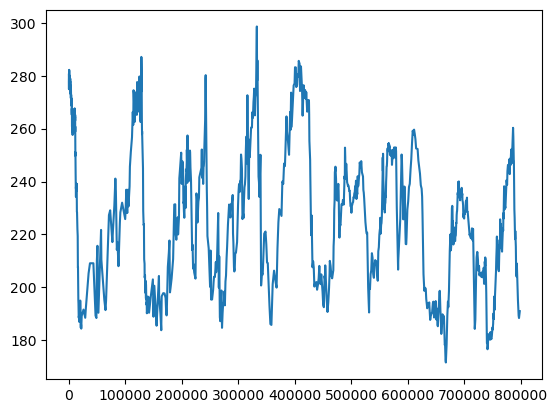

In [108]:
plt.plot(df11['EDC3_gas_a (yr)'],df11['CO2 (ppmv)'])
plt.show()

In [109]:
# Read the Excel file into a pandas DataFrame and exclude inital 14 rows
df12 = pd.read_excel('C02 IPCC Report.xlsx',sheet_name= 'CO2 Composite',skiprows=range(14))
df12

,Gasage (yr BP),CO2 (ppmv),sigma mean CO2 (ppmv)
0,-51.030000,368.022488,0.060442
1,-48.000000,361.780737,0.370000
2,-46.279272,359.647793,0.098000
3,-44.405642,357.106740,0.159923
4,-43.080000,353.946685,0.043007
...,...,...,...
1896,803925.284376,202.921723,2.064488
1897,804009.870607,207.498645,0.915083
1898,804522.674630,204.861938,1.642851
1899,805132.442334,202.226839,0.689587


In [110]:
df12.columns = df12.columns.str.lstrip()
df12.columns = df12.columns.str.rstrip()

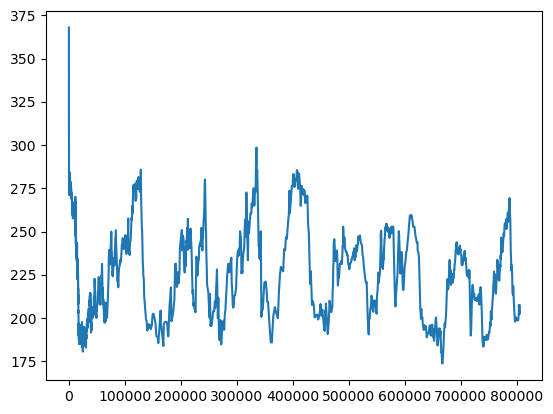

In [111]:
plt.plot(df12['Gasage (yr BP)'],df12['CO2 (ppmv)'])
plt.show()

In [112]:
df11.head()
df12.head()

,Gasage (yr BP),CO2 (ppmv),sigma mean CO2 (ppmv)
0,-51.030000,368.022488,0.060442
1,-48.000000,361.780737,0.370000
2,-46.279272,359.647793,0.098000
3,-44.405642,357.106740,0.159923
4,-43.080000,353.946685,0.043007


In [113]:
df11.dtypes

EDC3_gas_a (yr)      int64
CO2 (ppmv)         float64
dtype: object

In [114]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   EDC3_gas_a (yr)  1096 non-null   int64  
 1   CO2 (ppmv)       1096 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 17.2 KB


Remove blank spaces at beginning and end of string https://stackoverflow.com/questions/41476150/remove-or-replace-spaces-in-column-names

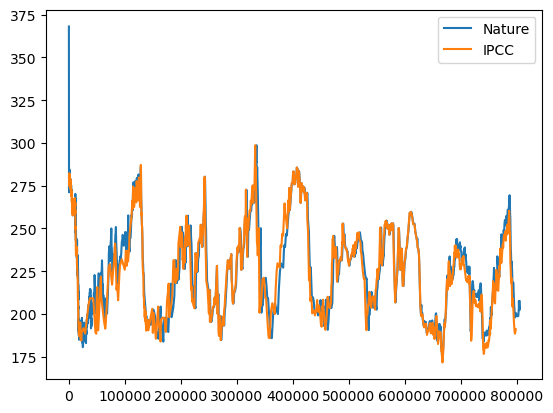

In [115]:
plt.plot(df12['Gasage (yr BP)'],df12['CO2 (ppmv)'], label = 'Nature')
plt.plot(df11['EDC3_gas_a (yr)'],df11['CO2 (ppmv)'], label = 'IPCC')
plt.legend()
plt.show()

In [116]:
df15=pd.read_csv('Mauna Loa CO2.csv',skiprows=range(43))
df15

,year,mean,unc
0,1959,315.98,0.12
1,1960,316.91,0.12
2,1961,317.64,0.12
3,1962,318.45,0.12
4,1963,318.99,0.12
...,...,...,...
59,2018,408.72,0.12
60,2019,411.65,0.12
61,2020,414.21,0.12
62,2021,416.41,0.12


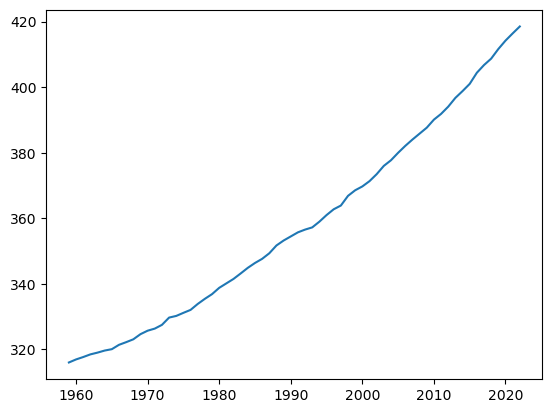

In [117]:
plt.plot(df15['year'],df15['mean'])
plt.show()

# Reading in Temperature data

In [118]:
df14=pd.read_csv('Temp Data Jouzel.csv',encoding='Latin')
#df13=pd.read_csv('Deuterium.csv',delimiter=r"\s+")
df14

,bag,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta
0,1,0.00,-50.00000,-55.000000,NaN,218.3,3.105321
1,2,0.55,-43.55977,-50.513333,NaN,218.3,3.104805
2,3,1.10,-37.44019,-46.026667,NaN,218.3,3.104404
3,4,1.65,-31.64156,-41.540000,NaN,218.3,3.104025
4,5,2.20,-24.55278,-34.516667,NaN,218.3,3.103453
...,...,...,...,...,...,...,...
5814,5815,3197.70,816871.60000,817562.000000,-432.2,211.0,1.529000
5815,5816,3198.25,817693.60000,818631.000000,-431.4,211.2,1.548000
5816,5817,3198.80,818505.50000,819700.000000,-430.3,211.3,1.576000
5817,5818,3199.35,819303.10000,820769.000000,-429.8,211.4,1.589000


In [119]:
def kelvin_to_celsius(temp):
    return temp - 273.15

In [120]:
df14['celsius'] = df14['temp'].apply(kelvin_to_celsius)

In [121]:
df14

,bag,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta,celsius
0,1,0.00,-50.00000,-55.000000,NaN,218.3,3.105321,-54.85
1,2,0.55,-43.55977,-50.513333,NaN,218.3,3.104805,-54.85
2,3,1.10,-37.44019,-46.026667,NaN,218.3,3.104404,-54.85
3,4,1.65,-31.64156,-41.540000,NaN,218.3,3.104025,-54.85
4,5,2.20,-24.55278,-34.516667,NaN,218.3,3.103453,-54.85
...,...,...,...,...,...,...,...,...
5814,5815,3197.70,816871.60000,817562.000000,-432.2,211.0,1.529000,-62.15
5815,5816,3198.25,817693.60000,818631.000000,-431.4,211.2,1.548000,-61.95
5816,5817,3198.80,818505.50000,819700.000000,-430.3,211.3,1.576000,-61.85
5817,5818,3199.35,819303.10000,820769.000000,-429.8,211.4,1.589000,-61.75


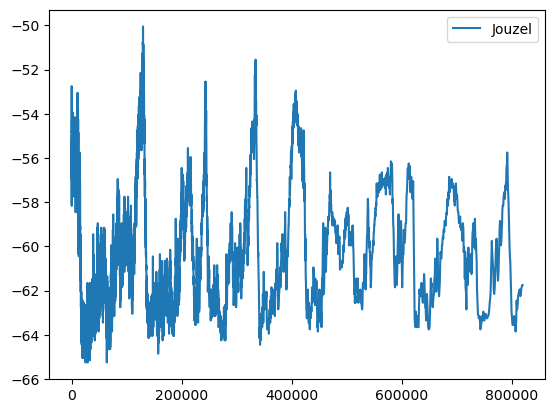

In [122]:
plt.plot(df14['EDC3béta'],df14['celsius'], label = 'Jouzel')
#plt.plot(df11['EDC3_gas_a (yr)'],df11['CO2 (ppmv)'], label = 'IPCC')
plt.legend()
plt.show()

In [123]:
df13=pd.read_csv('Temp data NOAA.csv',skiprows=range(91),delimiter=r"\s+")
#df13=pd.read_csv('Deuterium.csv',delimiter=r"\s+")
df13


,Bag,ztop,Age,Deuterium,Temperature
0,1,0.00,-50.00000,NaN,NaN
1,2,0.55,-43.54769,NaN,NaN
2,3,1.10,-37.41829,NaN,NaN
3,4,1.65,-31.61153,NaN,NaN
4,5,2.20,-24.51395,NaN,NaN
...,...,...,...,...,...
5795,5796,3187.25,797408.00000,-440.20,-8.73
5796,5797,3187.80,798443.00000,-439.00,-8.54
5797,5798,3188.35,799501.00000,-441.10,-8.88
5798,5799,3188.90,800589.00000,-441.42,-8.92


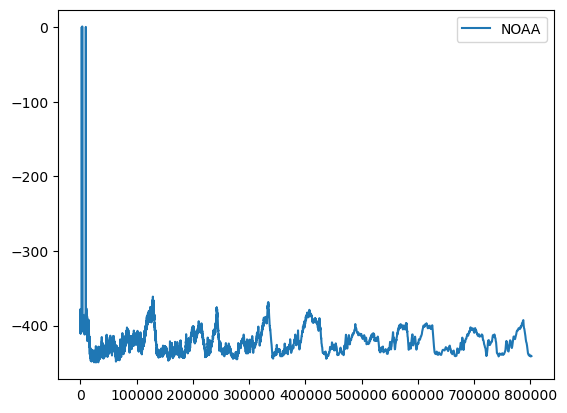

In [124]:
#plt.plot(df14['EDC3béta'],df14['temp'], label = 'Nature')
plt.plot(df13['Age'],df13['Deuterium'], label = 'NOAA')
plt.legend()
plt.show()

In [125]:
df13.describe()

,Bag,ztop,Age,Deuterium,Temperature
count,5800.000000,5800.000000,5800.000000,5788.000000,5785.000000
mean,2900.500000,1594.725000,190016.390617,-417.579610,-4.580228
std,1674.460112,920.953062,192546.207239,20.359332,3.446971
min,1.000000,0.000000,-50.000000,-449.500000,-10.580000
25%,1450.750000,797.362500,46330.569350,-432.500000,-7.450000
50%,2900.500000,1594.725000,121793.340000,-421.300000,-5.200000
75%,4350.250000,2392.087500,272456.740000,-403.200000,-1.820000
max,5800.000000,3189.450000,801662.000000,0.950000,5.460000


In [126]:
df13.dtypes

Bag              int64
ztop           float64
Age            float64
Deuterium      float64
Temperature    float64
dtype: object

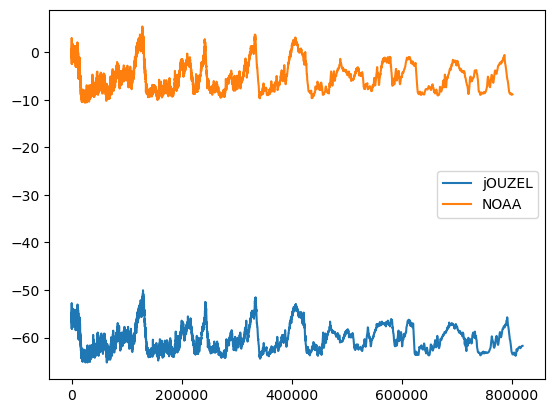

In [127]:
plt.plot(df14['EDC3béta'],df14['celsius'], label = 'jOUZEL')
plt.plot(df13['Age'],df13['Temperature'], label = 'NOAA')
plt.legend()
plt.show()

# Read in Irish weather

In [128]:
df16=pd.read_csv('Composite Rainfall Ireland.csv')
#df131=pd.read_csv('Composite Rainfall Ireland.csv',skiprows=range(91),delimiter=r"\s+")
#Composite Rainfall Ireland

In [129]:
df16

,Year,Month,Median montly series
0,1711,1,16.4
1,1711,2,73.1
2,1711,3,121.2
3,1711,4,85.2
4,1711,5,66.6
...,...,...,...
3667,2016,8,79.1
3668,2016,9,108.1
3669,2016,10,51.8
3670,2016,11,58.0


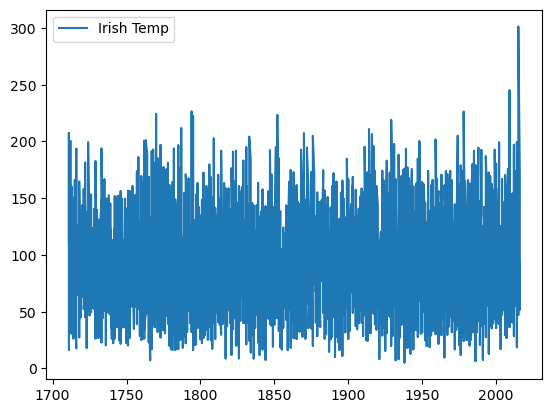

In [130]:
plt.plot(df16['Year'],df16['Median montly series'], label = 'Irish Temp')
plt.legend()
plt.show()

### above graph messy so going to get yearly average

In [177]:
df16a=pd.read_csv('Composite Rainfall Ireland.csv')

In [178]:
#df16a.columns = df16a.columns.str.lstrip()
#df16a.columns = df16a.columns.str.rstrip()

In [179]:
print(df16a.head())

   Year  Month  Median montly series
0  1711      1                  16.4
1  1711      2                  73.1
2  1711      3                 121.2
3  1711      4                  85.2
4  1711      5                  66.6


In [180]:
yearly_averages = df16a.groupby('Year')['Median montly series'].mean()
# Print the yearly averages
print(yearly_averages)
# Print the yearly averages
#print(yearly_averages)

Year
1711     90.966667
1712    104.383333
1713     81.875000
1714     73.683333
1715    104.833333
           ...    
2012     98.641667
2013     93.041667
2014    105.225000
2015    112.166667
2016     88.391667
Name: Median montly series, Length: 306, dtype: float64


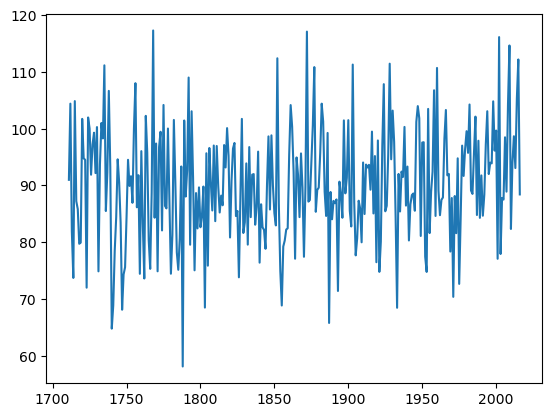

In [181]:
plt.plot(yearly_averages, label='Yearly Averages')

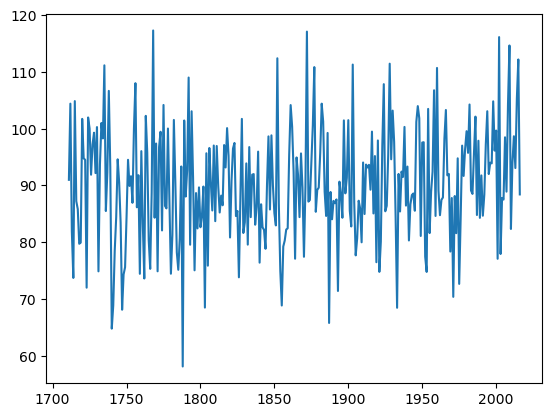

In [182]:
import matplotlib.pyplot as plt
plt.plot(yearly_averages, label='Yearly Averages')
# Plot the df.year values as a scatter plot


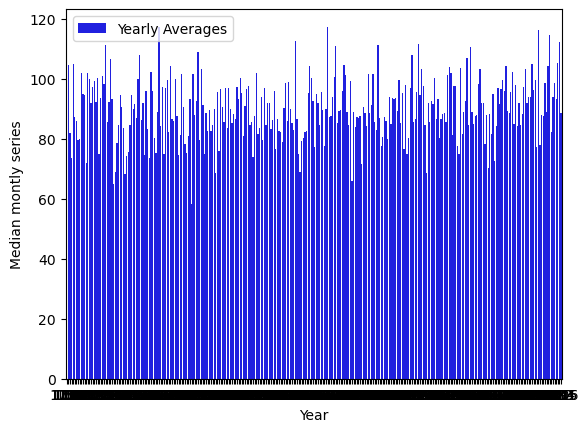

In [184]:
df16a

,Year,Month,Median montly series
0,1711,1,16.4
1,1711,2,73.1
2,1711,3,121.2
3,1711,4,85.2
4,1711,5,66.6
...,...,...,...
3667,2016,8,79.1
3668,2016,9,108.1
3669,2016,10,51.8
3670,2016,11,58.0


In [185]:
#https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc3deuttemp2007.txt

#https://stackoverflow.com/questions/19632075/how-to-read-file-with-space-separated-values-in-pandas
df1=pd.read_csv('summary.csv',delimiter=r"\s+")
#df1 = pd.read_csv("deter.csv",sep = " ")
#df1.describe()
#print(df1['Bag'])


In [186]:
df1.dtypes

,Gasage                                       object
(yr                                          float64
BP),CO2                                      float64
(ppmv),sigma                                 float64
mean                                         float64
CO2                                          float64
(ppmv),Bag,ztop,Age,Deuterium,Temperature    float64
dtype: object

In [187]:
df1.columns = df1.columns.str.lstrip()
df1.columns = df1.columns.str.rstrip()

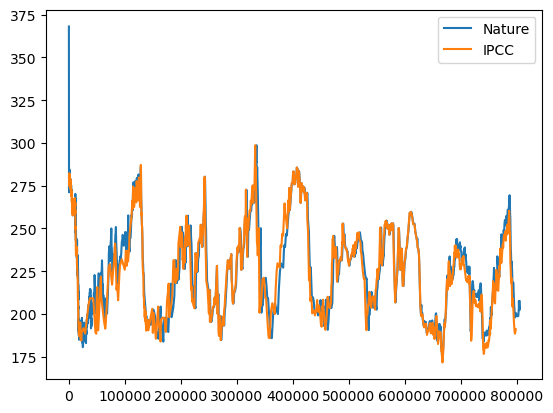

In [188]:

plt.plot(df12['Gasage (yr BP)'],df12['CO2 (ppmv)'], label = 'Nature')
plt.plot(df11['EDC3_gas_a (yr)'],df11['CO2 (ppmv)'], label = 'IPCC')
plt.legend()
plt.show()

In [189]:
result=pd.concat([df11,df12,df13,df14,df15],axis =1)
print(result)

      EDC3_gas_a (yr)  CO2 (ppmv)  Gasage (yr BP)  CO2 (ppmv)  \
0               137.0       280.4      -51.030000  368.022488   
1               268.0       274.9      -48.000000  361.780737   
2               279.0       277.9      -46.279272  359.647793   
3               395.0       279.1      -44.405642  357.106740   
4               404.0       281.9      -43.080000  353.946685   
...               ...         ...             ...         ...   
5814              NaN         NaN             NaN         NaN   
5815              NaN         NaN             NaN         NaN   
5816              NaN         NaN             NaN         NaN   
5817              NaN         NaN             NaN         NaN   
5818              NaN         NaN             NaN         NaN   

      sigma mean CO2 (ppmv)  Bag  ztop       Age  Deuterium  Temperature  ...  \
0                  0.060442  1.0  0.00 -50.00000        NaN          NaN  ...   
1                  0.370000  2.0  0.55 -43.54769        N

In [190]:
md= pd.concat([df11,df15],axis =1)
md

,EDC3_gas_a (yr),CO2 (ppmv),year,mean,unc
0,137,280.4,1959.0,315.98,0.12
1,268,274.9,1960.0,316.91,0.12
2,279,277.9,1961.0,317.64,0.12
3,395,279.1,1962.0,318.45,0.12
4,404,281.9,1963.0,318.99,0.12
...,...,...,...,...,...
1091,794608,199.4,NaN,NaN,NaN
1092,795202,195.2,NaN,NaN,NaN
1093,796467,189.3,NaN,NaN,NaN
1094,797099,188.4,NaN,NaN,NaN


In [191]:
#https://researchdatapod.com/how-to-solve-python-typeerror-object-of-type-dataframe-is-not-json-serializable/
import json
json_str = result.to_csv()
with open('data.json', 'w') as f:
    json.dump(json_str, f)

In [192]:
# #https://stackoverflow.com/questions/34926517/stop-sys-stdout-from-writing-to-a-text-file
import csv
import sys

csv_str = result.to_csv()
#sys.stdout = open ("summary.csv","w")
#print(csv_str)
print("******************")
#sys.close()
print("abc")

******************
abc
